In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from matplotlib.image import imread
from PIL import Image

In [2]:
folder_path = '9mm data'

# Get a list of all PNG files in the folder
png_files = [f for f in os.listdir(folder_path) if f.endswith('.png')]

# Create an empty DataFrame
image_df = pd.DataFrame(columns=['File', 'Width', 'Height', 'Mode'])

# Populate the DataFrame with image information
for png_file in png_files:
    img_path = os.path.join(folder_path, png_file)
    img = Image.open(img_path)
    
    # Extract image information
    img_info = {
        'File': png_file,
        'Width': img.width,
        'Height': img.height,
        'Mode': img.mode
    }

    # Append image information to DataFrame
    image_df = image_df.append(img_info, ignore_index=True)



/var/folders/3x/p7lwfzdd6x11jg4cqqq6mh3w0000gn/T/ipykernel_35957/4142628462.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_df = image_df.append(img_info, ignore_index=True)
/var/folders/3x/p7lwfzdd6x11jg4cqqq6mh3w0000gn/T/ipykernel_35957/4142628462.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_df = image_df.append(img_info, ignore_index=True)
/var/folders/3x/p7lwfzdd6x11jg4cqqq6mh3w0000gn/T/ipykernel_35957/4142628462.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_df = image_df.append(img_info, ignore_index=True)
/var/folders/3x/p7lwfzdd6x11jg4cqqq6mh3w0000gn/T/ipykernel_35957/4142628462.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a futur

In [3]:
image_df

,File,Width,Height,Mode
0,CWRBF0010.png,2592,1944,L
1,CWRBF0004.png,2592,1944,L
2,CWRBF1050.png,2592,1944,L
3,CWRBF0400.png,2592,1944,L
4,CWRBF0825.png,2592,1944,L
...,...,...,...,...
86,CWRBF1100.png,2592,1944,L
87,CWRBF0800.png,2592,1944,L
88,CWRBF1075.png,2592,1944,L
89,CWRBF0425.png,2592,1944,L


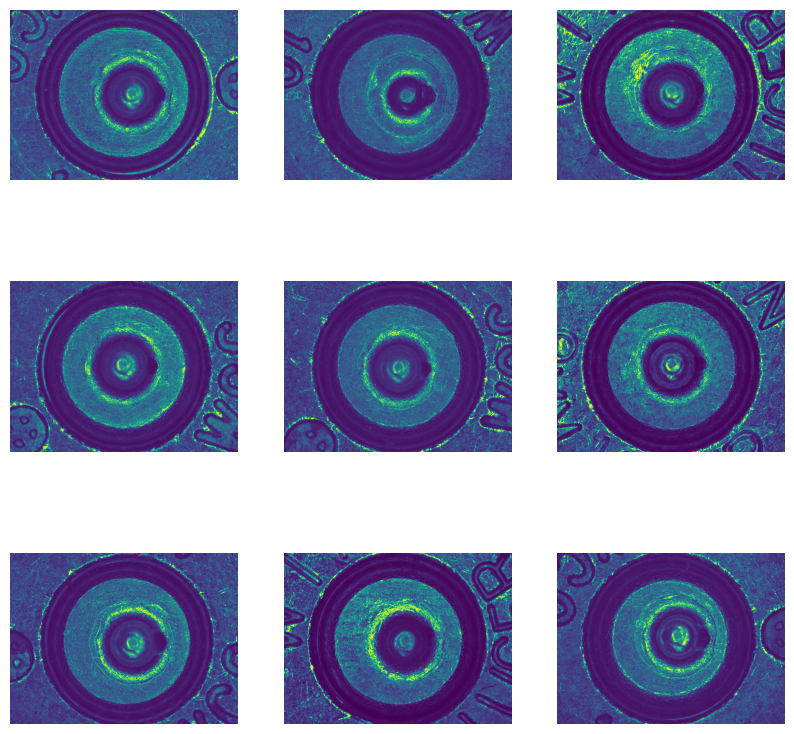

In [4]:
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Replace 'your_images_folder' with the actual folder containing your PNG images
folder_path = '9mm data'

# Get a list of all PNG files in the folder
png_files = [f for f in os.listdir(folder_path) if f.endswith('.png')]

# Display the first few images in a grid
num_images_to_display = 9
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    if i < len(png_files):
        img_path = os.path.join(folder_path, png_files[i])
        img = imread(img_path)
        ax.imshow(img)
        ax.axis('off')  # Turn off axis labels

plt.show()


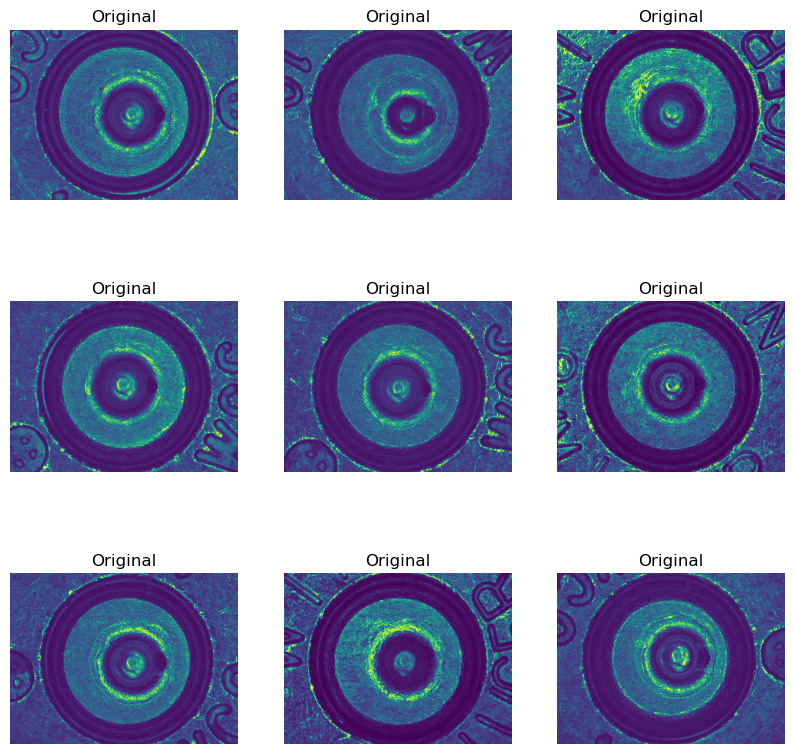

In [5]:
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Replace 'your_images_folder' with the actual folder containing your PNG images
folder_path = '9mm data'

# Get a list of all PNG files in the folder
png_files = [f for f in os.listdir(folder_path) if f.endswith('.png')]

# Display the first few original color images in a grid
num_images_to_display = 9
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    if i < len(png_files):
        img_path = os.path.join(folder_path, png_files[i])
        img = imread(img_path)
        ax.imshow(img, cmap='viridis')  # Explicitly set cmap to avoid automatic choice
        ax.axis('off')  # Turn off axis labels
        ax.set_title('Original')

plt.show()


In [6]:
# Let's start by loading and examining the JSON file to understand its structure
import json

# Load the JSON file
json_file_path = '9mm_annotation.json'
with open(json_file_path, 'r') as file:
    annotations = json.load(file)

# Displaying a snippet of the JSON data to understand its structure
annotations_snippet = json.dumps(annotations, indent=2)[:500]  # Display only the first 500 characters for a brief overview
annotations_snippet


'{\n  "info": {\n    "description": "my-project-name"\n  },\n  "images": [\n    {\n      "id": 1,\n      "width": 2592,\n      "height": 1944,\n      "file_name": "CWRBF0001.png"\n    },\n    {\n      "id": 2,\n      "width": 2592,\n      "height": 1944,\n      "file_name": "CWRBF0002.png"\n    },\n    {\n      "id": 3,\n      "width": 2592,\n      "height": 1944,\n      "file_name": "CWRBF0003.png"\n    },\n    {\n      "id": 4,\n      "width": 2592,\n      "height": 1944,\n      "file_name": "CWRBF0004.png"\n    },\n    {\n'

In [7]:
# Exploring the structure of the annotations in the JSON file to understand how they are stored
# This is necessary to know how to extract the relevant data for image processing

# Checking the keys in the JSON file to locate the annotations
keys_in_json = annotations.keys()

# Checking the first few annotations to understand their structure
first_few_annotations = json.dumps(annotations['annotations'][:5], indent=2)

keys_in_json, first_few_annotations


(dict_keys(['info', 'images', 'annotations', 'categories']),
 '[\n  {\n    "id": 0,\n    "iscrowd": 0,\n    "image_id": 1,\n    "category_id": 1,\n    "segmentation": [\n      [\n        1059.767088607595,\n        354.3493670886076,\n        961.3367088607595,\n        396.1822784810127,\n        875.2101265822785,\n        445.39746835443043,\n        811.2303797468354,\n        506.9164556962026,\n        757.093670886076,\n        568.4354430379748,\n        661.1240506329113,\n        703.7772151898735,\n        658.6632911392405,\n        780.060759493671,\n        611.9088607594937,\n        1065.5088607594937,\n        658.6632911392405,\n        1259.9088607594938,\n        727.5645569620253,\n        1355.8784810126583,\n        985.9443037974684,\n        1594.5721518987343,\n        1254.167088607595,\n        1668.394936708861,\n        1519.9291139240506,\n        1638.8658227848102,\n        1719.2506329113926,\n        1542.8962025316457,\n        1911.1898734177216,\n 

In [8]:
def extract_annotations(json_data):
    """
    Extracts annotations from the JSON data and organizes them by image.
    
    Parameters:
    json_data (dict): The loaded JSON data containing annotations.

    Returns:
    dict: A dictionary where each key is an image_id and the value is a list of annotations for that image.
    """
    annotations_by_image = {}

    for annotation in json_data['annotations']:
        image_id = annotation['image_id']
        segmentation = annotation['segmentation']
        category_id = annotation['category_id']

        if image_id not in annotations_by_image:
            annotations_by_image[image_id] = []

        annotations_by_image[image_id].append({'segmentation': segmentation, 'category_id': category_id})

    return annotations_by_image

# Using the function to extract annotations
annotations_by_image = extract_annotations(annotations)

# Display a small snippet of the result to verify
example_image_id = list(annotations_by_image.keys())[0]  # Example image ID
annotations_by_image[example_image_id][:2]  # Displaying first two annotations for this image as an example


[{'segmentation': [[1059.767088607595,
    354.3493670886076,
    961.3367088607595,
    396.1822784810127,
    875.2101265822785,
    445.39746835443043,
    811.2303797468354,
    506.9164556962026,
    757.093670886076,
    568.4354430379748,
    661.1240506329113,
    703.7772151898735,
    658.6632911392405,
    780.060759493671,
    611.9088607594937,
    1065.5088607594937,
    658.6632911392405,
    1259.9088607594938,
    727.5645569620253,
    1355.8784810126583,
    985.9443037974684,
    1594.5721518987343,
    1254.167088607595,
    1668.394936708861,
    1519.9291139240506,
    1638.8658227848102,
    1719.2506329113926,
    1542.8962025316457,
    1911.1898734177216,
    1326.3493670886078,
    2002.2379746835445,
    989.2253164556963,
    1933.3367088607595,
    691.473417721519,
    1711.86835443038,
    440.4759493670887,
    1487.9392405063293,
    329.7417721518988,
    1327.9898734177216,
    305.1341772151899,
    1123.746835443038,
    322.3594936708861]],
  'ca

In [11]:
!pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 MB 17.2 MB/s eta 0:00:0000:0100:01


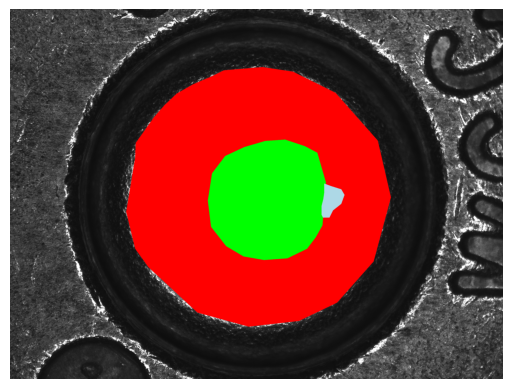

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_masks(image_path, annotations, colors):
    """
    Apply masks to an image based on the annotations.

    Parameters:
    image_path (str): Path to the image file.
    annotations (list): List of annotations for the image.
    colors (dict): Dictionary mapping category IDs to colors.

    Returns:
    numpy.ndarray: The image with applied masks.
    """
    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

    for annotation in annotations:
        category_id = annotation['category_id']
        segmentation = annotation['segmentation'][0]  # Assuming first element is the correct segmentation
        polygon = np.array(segmentation).reshape((-1, 1, 2)).astype(np.int32)
        cv2.fillPoly(image, [polygon], colors[category_id])

    return image

# Define the colors for each category (assuming category IDs are sequential starting from 1)
colors = {
    1: (255, 0, 0),     # Red for Breech-face impression
    2: (0, 255, 0),     # Green for Aperture shear
    3: (128, 0, 128),   # Purple for Firing pin impression
    4: (173, 216, 230)  # Light Blue for Firing pin drag
}

# Example usage with one image (adjust with the correct file path and annotations)
example_image_path = "9mm data/CWRBF0002.png"  # Replace with the correct path to your image
example_annotations = annotations_by_image[example_image_id]  # Use the extracted annotations

masked_image = apply_masks(example_image_path, example_annotations, colors)

# Display the masked image
plt.imshow(masked_image)
plt.axis('off')
plt.show()


In [9]:
# Re-importing necessary libraries since execution state has been reset
import cv2
import numpy as np
import matplotlib.pyplot as plt
import json

# Load the JSON annotations again
with open('9mm_annotation.json', 'r') as file:
    annotations = json.load(file)

# Define the colors for each category (assuming category IDs are sequential starting from 1)
colors = {
    1: (255, 0, 0),     # Red for Breech-face impression
    2: (0, 255, 0),     # Green for Aperture shear
    3: (128, 0, 128),   # Purple for Firing pin impression
    4: (173, 216, 230)  # Light Blue for Firing pin drag
}

# Function to calculate the centroid of a polygon given its vertices
def calculate_centroid(segmentation):
    x_coords = [point[0] for point in segmentation]
    y_coords = [point[1] for point in segmentation]
    centroid_x = sum(x_coords) / len(x_coords)
    centroid_y = sum(y_coords) / len(y_coords)
    return (int(centroid_x), int(centroid_y))

# Function to process annotations and draw colored masks and arrows on images
def process_images(annotations_by_image, annotations, colors):
    for image_id, image_annotations in annotations_by_image.items():
        # Find the corresponding image file
        image_info = next((item for item in annotations['images'] if item['id'] == image_id), None)
        if not image_info:
            continue
        image_file = image_info['file_name']
#        image_path = f'/mnt/data/{image_file}'
        image_path = f'9mm data/{image_file}'
        # Load the image
        
        image = cv2.imread(image_path)
        #print(image)
        if image is None:
            continue
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Variables to store the centroids for the arrow
        centroid_firing_pin_impression = None
        centroid_firing_pin_drag = None

        # Apply masks based on the category
        for annotation in image_annotations:
            # Get segmentation and category_id
            segmentation = np.array(annotation['segmentation'][0], dtype=np.int32).reshape((-1, 1, 2))
            #print(segmentation)
            category_id = annotation['category_id']

            # Fill the polygon
            if category_id in colors:
                cv2.fillPoly(image, [segmentation], colors[category_id])
            #print(annotation['segmentation'][0])
            # Calculate centroids for arrow drawing
#            if category_id == 3:  # Firing pin impression category ID
#                centroid_firing_pin_impression = calculate_centroid(annotation['segmentation'][0])
#            elif category_id == 4:  # Firing pin drag category ID
#                centroid_firing_pin_drag = calculate_centroid(annotation['segmentation'][0])

        # Draw the arrow if both centroids are available
#        if centroid_firing_pin_impression and centroid_firing_pin_drag:
#            cv2.arrowedLine(image, centroid_firing_pin_impression, centroid_firing_pin_drag, (0, 0, 255), 2, tipLength=0.3)

        # Convert back to BGR for displaying/saving with OpenCV
        image_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        # Save or display the image
        save_path = f'/Users/sn/Documents/rnn/9mm data/masked/{image_file}'
        cv2.imwrite(save_path, image_bgr)
        print(f"Processed image saved to: {save_path}")

# Extract annotations for each image
annotations_by_image = {}
for annotation in annotations['annotations']:
    image_id = annotation['image_id']
    if image_id not in annotations_by_image:
        annotations_by_image[image_id] = []
    annotations_by_image[image_id].append(annotation)
#print(annotations_by_image)
# Process the images
process_images(annotations_by_image, annotations, colors)


Processed image saved to: /Users/sn/Documents/rnn/9mm data/masked/CWRBF0001.png
Processed image saved to: /Users/sn/Documents/rnn/9mm data/masked/CWRBF0002.png
Processed image saved to: /Users/sn/Documents/rnn/9mm data/masked/CWRBF0003.png
Processed image saved to: /Users/sn/Documents/rnn/9mm data/masked/CWRBF0004.png
Processed image saved to: /Users/sn/Documents/rnn/9mm data/masked/CWRBF0005.png
Processed image saved to: /Users/sn/Documents/rnn/9mm data/masked/CWRBF0006.png
Processed image saved to: /Users/sn/Documents/rnn/9mm data/masked/CWRBF0007.png
Processed image saved to: /Users/sn/Documents/rnn/9mm data/masked/CWRBF0008.png
Processed image saved to: /Users/sn/Documents/rnn/9mm data/masked/CWRBF0009.png
Processed image saved to: /Users/sn/Documents/rnn/9mm data/masked/CWRBF0010.png
Processed image saved to: /Users/sn/Documents/rnn/9mm data/masked/CWRBF0025.png
Processed image saved to: /Users/sn/Documents/rnn/9mm data/masked/CWRBF0050.png
Processed image saved to: /Users/sn/Docu

In [6]:
# Let's check the current directory for the processed file
import os

# List all files in the directory
processed_files = os.listdir(f'/Users/sn/Documents/rnn/9mm data')
# Filter out the processed files with 'masked_' prefix
masked_files = [file for file in processed_files if file.startswith('masked_')]

masked_files


['masked_CWRBF0850.png',
 'masked_CWRBF1025.png',
 'masked_CWRBF0475.png',
 'masked_CWRBF0925.png',
 'masked_CWRBF0500.png',
 'masked_CWRBF1150.png',
 'masked_CWRBF1350.png',
 'masked_CWRBF0700.png',
 'masked_CWRBF0675.png',
 'masked_CWRBF1225.png',
 'masked_CWRBF0275.png',
 'masked_CWRBF1625.png',
 'masked_CWRBF1750.png',
 'masked_CWRBF0300.png',
 'masked_CWRBF0100.png',
 'masked_CWRBF1550.png',
 'masked_CWRBF1975.png',
 'masked_CWRBF1425.png',
 'masked_CWRBF0075.png',
 'masked_CWRBF1800.png',
 'masked_CWRBF1250.png',
 'masked_CWRBF0600.png',
 'masked_CWRBF0006.png',
 'masked_CWRBF0007.png',
 'masked_CWRBF0775.png',
 'masked_CWRBF1325.png',
 'masked_CWRBF2000.png',
 'masked_CWRBF1125.png',
 'masked_CWRBF0575.png',
 'masked_CWRBF0950.png',
 'masked_CWRBF0005.png',
 'masked_CWRBF0010.png',
 'masked_CWRBF0004.png',
 'masked_CWRBF0400.png',
 'masked_CWRBF1050.png',
 'masked_CWRBF0825.png',
 'masked_CWRBF1875.png',
 'masked_CWRBF1450.png',
 'masked_CWRBF0001.png',
 'masked_CWRBF1900.png',
